# Introduction to Natural Language Processing

In [50]:
import matplotlib.pyplot as plt

## Lecture goals

- What is Natural Language Processing (NLP)? A brief survey.  
   - Text as *social science data*.
- Simple NLP with "base Python".
   - Tokenization.
   - Sentiment analysis. 

## What is NLP?

> **Natural Language Processing** (NLP) is a field that builds and evaluates technologies for *processing* and *manipulating* language data.

- NLP is *interdisciplinary*: Computer Science, Data Science, Linguistics, and more.
- NLP is both *theoretical* and *applied*.
   - Basic research on new algorithms, data structures, neural network architectures.  
   - Application of technology to specific domains (and evaluation).

**Why might NLP be useful for CSS?**

### Language as data

- CSS studies **social science data**.  
- Human **language** is itself a kind of data! 
   - Can be used to study *language* and *language change*.
   - Can also be used to study *social behavior* more generally.
- The challenge is that most language data is **unstructured**.  
- NLP tools can be useful for extracting structure from language data.

### Case study 1: Bias and word meanings

[Garg et al. (2018)](https://www.pnas.org/doi/pdf/10.1073/pnas.1720347115) use **word embeddings** to quantify 100 years of gender and ethnic stereotypes.

![Optional Caption](img/garg_bias.png)


### Case study 2: Six basic story shapes

[Reagan et al. (2016)](https://link.springer.com/article/10.1140/epjds/s13688-016-0093-1) use **sentiment analysis** to identify different "story arcs".

![Optional Caption](img/reagan_shapes.png)


### Case study 3: Six basic story shapes

[Ziems et al. (2024)](https://direct.mit.edu/coli/article/doi/10.1162/coli_a_00502/118498) ask whether **large language models** can help computational social scientists perform data annotation tasks.

![Optional Caption](img/ziems_llms.png)


### Case study 4: Psycholinguistic data annotation

[Trott (2024)](https://link.springer.com/article/10.3758/s13428-024-02337-z) asks whether **large language models** can augment psycholinguistic datasets.

![Optional Caption](img/trott_llms.png)


### Case study 5: Predicting stock markets

[Tabari et al. (2018)](https://aclanthology.org/W18-3102.pdf) uses **sentiment analysis** to predict stock market changes.

![Optional Caption](img/tabari_stocks.png)


### But analyzing *language* is hard

- The challenge is that *text data* is **unstructured**.  
- Unlike a `DataFrame`, it's just one big `str`.

In [4]:
### Declaration of Independence
with open("data/text/declaration.txt", "r") as f:
    contents = f.read()

### Peeking at the first 100 characters
contents[0:100]

'In Congress, July 4, 1776\n\nThe unanimous Declaration of the thirteen united States of America, When '

## NLP in "base" Python

- There are now *numerous* Python NLP libraries.
   - `nltk`, `spaCy`, `transformers`, and more.
- But before we learn how to use those, it's useful to learn the **basics**.  
- How would we implement basic NLP functions without those libraries?
   - **Tokenization**.  
   - **Sentiment analysis**. 

## Tokenization: a gentle introduction

> **Tokenization** is the process of splitting a chunk of text into individuals elements or "tokens" (often *words*). 

- Tokenization is critical for *pre-processing* text.  
- Before counting, calculating sentiment, etc., must identify the tokens!
- It's also surprisingly challenging to do.

### Tokenizing with `split`

> The **`split`** function can be applied to a `str` to divide that `str` into individual elements.

In [5]:
example_str = "The quick brown fox jumped over the lazy dog"
example_str.split(" ") ### split on spaces

['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

#### Check-in

Use `split` to identify the tokens in the Declaration of Independence (`contents` below).

In [6]:
### Declaration of Independence
with open("data/text/declaration.txt", "r") as f:
    contents = f.read()

### tokens = ... ### Your code here!

#### Evaluating `split`

- This does okay, but messes up in some cases. 
- E.g., "4," is a single token.  
- Similarly, the newline character (`"\n"`) is *not* a space, so we fail to split "1776" and "The".

In [11]:
tokens = contents.split(" ")
tokens[0:5]

['In', 'Congress,', 'July', '4,', '1776\n\nThe']

#### A (somewhat hacky) workaround

- We *could* try get around the punctuation problem by **buffering** our punctuation.
- We can also *replace* our newline characters with spaces.  

In [13]:
contents_buffered = contents.replace("," , " ,").replace("\n", " ")
tokens = contents_buffered.split(" ")
tokens[0:6]

['In', 'Congress', ',', 'July', '4', ',']

This is better! But there are likely still **edge cases** we haven't thought of...and those would just make this even more complicated.

### Tokenizing with `re`

> The **`re`** library allows you to use **regular expressions**, a sequence of characters that can be used to *match* expressions in text.

- Upside: much more flexible than `split`.  
- Downside: harder to interpret and use.
   - ["I had a text processing problem, so I used Regex. Now I have even more problems."](https://xkcd.com/1171/)

In [14]:
import re ## regex package

#### `re` in action

- With Regex, we can define a *pattern* of characters we want to **match** (and then **split**) on.
  - `[]`: defines a *character set*. 
  - ` `: A space character.
  - `\t`: tab character.
  - `\n`: newline character.
  - `,!.?`: punctuation characters.
  - `+`: this means the pattern will match *sequences*, not just single instances.

In [19]:
text = "Hello, World! Let's explore tokenization."
tokens = re.split(r'[ \t\n,!.?]+', text)
tokens

['Hello', 'World', "Let's", 'explore', 'tokenization', '']

#### `re` is useful, but challenging!

- `re` is a very **powerful** package.  
- But it's also easy to mess up, or get confused.  
- If interested, [lots of guides on the Internet to regular expressions](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_expressions).  

## Sentiment analysis in base Python

> [**Sentiment analysis**](https://en.wikipedia.org/wiki/Sentiment_analysis) refers to the process of extracting or inferring "sentiment" (i.e., *affect*) from language data.

- *Sentiment* is multifaceted, but simple version is `positive` and `negative`.  
- Even `positive`/`negative` can be surprisingly nuanced and hard to extract.  
- There are many *libraries* to help with sentiment analysis, but we'll implement a simple approach here.

### Sentiment analysis: the basic steps

To build a **sentiment analysis** tool, we'll need to implement some basic steps.

- Create a *sentiment lexicon* (i.e., which words are `positive` or `negative`). 
- *Tokenize* a given text.  
- Identify the number of `positive` and `negative` words in that text.
- Produce some *average sentiment score* for the text. 

#### Step 1: A sentiment lexicon

> A **sentiment lexicon** maps individual words or tokens to our desired sentiment *labels*. 

- These are sometimes built by hand.  
- In other cases, we *infer* them using labeled text data (e.g., positive and negative reviews).

In [20]:
### Simple sentiment lexicon
pos_words = ['good', 'happy', 'great', 'exciting', 'delicious', 'best', 'love']
neg_words = ['bad', 'sad', 'horrible', 'boring', 'disgusting', 'worst', 'hate']

#### Step 2a: Create our texts

First, let's come up with some simple examples.

In [22]:
texts = [
    'That movie is the best, I love it!',
    'That meal was disgusting',
    'I am so happy today!',
    'When my code breaks, I feel sad.'
]

#### Step 2b: Tokenize each text

- Let's make our text `lower`, `replace` punctuation, and then `split(" ")`.

In [27]:
tokenized_texts = []
for t in texts:
    t_tokenized = t.lower().replace(".", "").replace("!", "").replace(",","").split(" ")
    tokenized_texts.append(t_tokenized)

In [26]:
tokenized_texts

[['That', 'movie', 'is', 'the', 'best', 'I', 'love', 'it'],
 ['That', 'meal', 'was', 'disgusting'],
 ['I', 'am', 'so', 'happy', 'today'],
 ['When', 'my', 'code', 'breaks', 'I', 'feel', 'sad']]

#### Step 3: Identify the sentiment of each word in a given text.

In [29]:
def get_sentimental_words(tokenized_text, pos_words, neg_words):
    p = 0
    n = 0
    for token in tokenized_text:
        if token in pos_words:
            p += 1
        if token in neg_words:
            n += 1
    return {'pos': p, 'neg': n, 'length': len(tokenized_text)}

In [34]:
### Let's try it!
print(tokenized_texts[0])
print(get_sentimental_words(tokenized_texts[0], pos_words, neg_words))

['that', 'movie', 'is', 'the', 'best', 'i', 'love', 'it']
{'pos': 1, 'neg': 0, 'length': 8}


#### Step 4: Score sentiment

A simple method for **scoring** a text is to take the weighted average of positive and negative words.

In [35]:
def calculate_sentiment(tokenized_text, pos_words, neg_words):
    sentimental_words = get_sentimental_words(tokenized_text, pos_words, neg_words)
    return (sentimental_words['pos'] * 1 + sentimental_words['neg'] * -1) / sentimental_words['length']

In [36]:
calculate_sentiment(tokenized_texts[0], pos_words, neg_words)

0.125

#### Step 5: Apply to each text!

In [37]:
for t in tokenized_texts:
    sentiment = calculate_sentiment(t, pos_words, neg_words)
    print(t)
    print("Sentiment: {s}".format(s = sentiment))

['that', 'movie', 'is', 'the', 'best', 'i', 'love', 'it']
Sentiment: 0.125
['that', 'meal', 'was', 'disgusting']
Sentiment: -0.25
['i', 'am', 'so', 'happy', 'today']
Sentiment: 0.2
['when', 'my', 'code', 'breaks', 'i', 'feel', 'sad']
Sentiment: -0.14285714285714285


### Applying our steps

- Now, let's apply this to the Declaration of Independence.  

In [38]:
### Declaration of Independence
with open("data/text/declaration.txt", "r") as f:
    contents = f.read()

In [40]:
### Tokenize text
t_tokenized = contents.lower().replace(".", "").replace("!", "").replace(",","").split(" ")

In [42]:
### Score sentment
sentiment = calculate_sentiment(t_tokenized, pos_words, neg_words)
sentiment

0.0023023791250959325

#### Check-in

Can you first tokenize the Declaration of Independence into *sentences* (roughly), and then calculate the **trajectory** of sentiment across sentences?

In [43]:
### Your code here

#### Implementation

In [46]:
 ### first, tokenize into sentences (roughly)
sentences = contents.lower().split(".")
### Now, tokenize each sentence
tokenized_sentences = [s.split(" ") for s in sentences]
### now, score sentiment
scored_sentiments = [calculate_sentiment(s, pos_words, neg_words) for s in tokenized_sentences]

#### Plotting the trajectory

Kind of boring trajectory, probably because our sentiment lexicon isn't very good!

Text(0.5, 0, 'Sentence index')

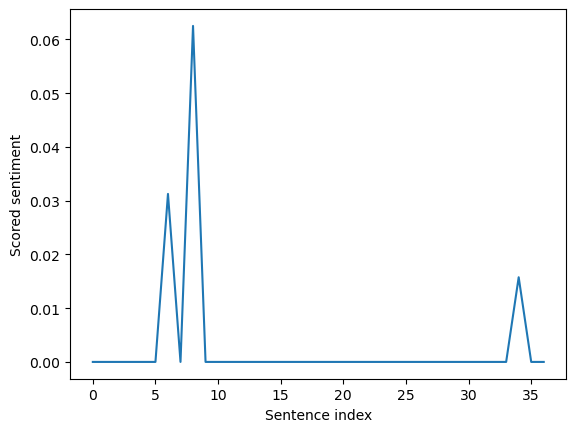

In [54]:
plt.plot(scored_sentiments)
plt.ylabel("Scored sentiment")
plt.xlabel("Sentence index")

### Limitations

- This simple and naive approach has many limitations.  
- Our sentiment lexicon is very **small**.  
- Often sentiment depends on more than just **individual words** ("not great"!).
- Sentiment is sometimes in the eye of the beholder.  
- But on the whole, it's not bad!

## Wrap-up

- NLP tools are useful for conducting **computational social science** research on *language data*.  
   - Must first *tokenize* text.  
   - Then apply some kind of *processing*, e.g., *sentiment analysis*.
- There are now many libraries for doing this.  
- But it's also useful to learn how to do these things in **base Python**.